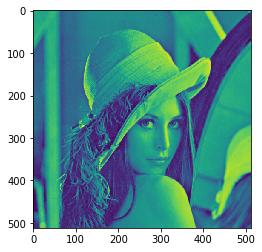

In [10]:
from PIL import Image
import numpy
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

image =Image.open('lena512.bmp')
image = numpy.array(image)
(H,W) = image.shape
    
plt.imshow(image)

# Add noise
noise_image = image.copy()
noise = numpy.random.rand(H,W)

noise_location = where(noise < 0.1)
noise_image[noise_location] = (1-noise_image[noise_location])

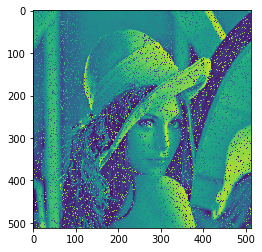

In [12]:
plt.imshow(noise_image)

In [18]:
def conviulution_kernel(kernelList, inputImage):
    kernelSizeXY = 3
    results = np.zeros((inputImage.shape))
    for yPosition in range(inputImage.shape[0]-kernelSizeXY):
        for xPosition in range(inputImage.shape[1]-kernelSizeXY):
            windowArea = inputImage[yPosition:yPosition+kernelSizeXY,
                                    xPosition:xPosition+kernelSizeXY]
            appliedKernel = windowArea * kernelList
            results[yPosition, xPosition] = np.sum(appliedKernel)
    return results

In [19]:
import scipy.stats as st
def gkern(kernlen=3, nsig=3):
    # https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy
    """Returns a 2D Gaussian kernel."""

    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

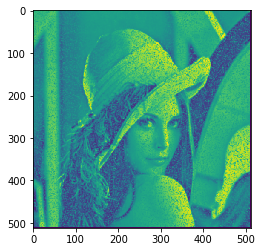

In [27]:
gausian = conviulution_kernel(gkern(3), noise_image)
plt.imshow(gausian)

In [24]:
def median_filter(image):
    results = image.copy()

    window = np.zeros((image.shape[0] * image.shape[1] + 2))
    
    edgey = image.shape[0] // 2 - 1
    edgex = image.shape[1] // 2 - 1
    kernel_size = 3
    for yPosition in range(image.shape[0]-kernel_size):
        for xPosition in range(image.shape[1]-kernel_size):
            windowArea = image[yPosition:yPosition+kernel_size,
                                    xPosition:xPosition+kernel_size]
            median = np.median(windowArea)
            results[yPosition, xPosition] = median
    return results

In [25]:
median_image = median_filter(noise_image)

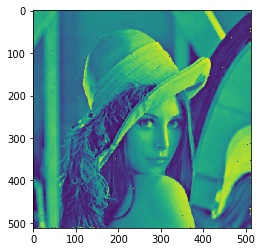

In [26]:
plt.imshow(median_image)

In [48]:
def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))

def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)

# https://en.wikipedia.org/wiki/Bilateral_filter

def work(image, x, y):
    radius = 5 // 2
    sum_weigth = 0
    
    filter_size = 0
    for yPosition in range(radius):
        for xPosition in range(radius):
            neighbour_x = x - (radius - xPosition)
            neighbour_y = y - (radius - yPosition)
                            
            gausian = gaussian(image[neighbour_y, neighbour_x] - image[y, x], 12.0)
            gausian_distance = gaussian(distance(neighbour_x, neighbour_y, x, y), 16.0)
            weigth = gausian * gausian_distance
            
            filter_size += image[neighbour_y][neighbour_x] * weigth
            
            sum_weigth += weigth
    
    return ( filter_size // sum_weigth )
            
           
def bilateral_filter(image):
    results = image.copy()
    for yPosition in range(image.shape[0] - 1):
        for xPosition in range(image.shape[1] - 1):
            results[yPosition, xPosition] = work(image, xPosition, yPosition)
    return results

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


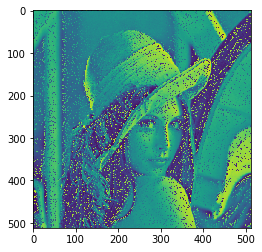

In [49]:
bilateral_image = bilateral_filter(noise_image)
plt.imshow(bilateral_image)

In [ ]:
# bilateral_filter will fails because the noisy pixel are 2 diffrent from neighbour

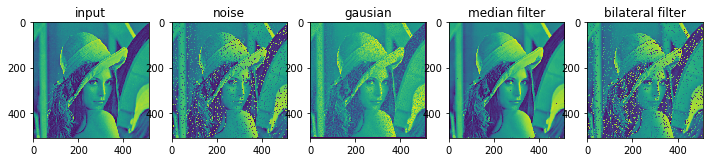

In [51]:
figure, axes = plt.subplots(1, 5, figsize=(12, 12))
axes[0].set_title("input")
axes[0].imshow(image)
axes[1].set_title("noise")
axes[1].imshow(noise_image)
axes[2].set_title("gausian")
axes[2].imshow(gausian)
axes[3].set_title("median filter")
axes[3].imshow(median_image)
axes[4].set_title("bilateral filter")
axes[4].imshow(bilateral_image)